<a href="https://colab.research.google.com/github/KumudaBG/CMPE-297-Special-Topics-Assignments/blob/main/Assignment4/tabular_task_with_text_autoviml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deep_autoviml

     |████████████████████████████████| 269 kB 5.2 MB/s 
     |████████████████████████████████| 308 kB 36.3 MB/s 
     |████████████████████████████████| 4.4 MB 31.8 MB/s 
     |████████████████████████████████| 23.2 MB 49.1 MB/s 
     |████████████████████████████████| 14.5 MB 35 kB/s 
     |████████████████████████████████| 170 kB 46.4 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 209 kB 47.6 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 144 kB 42.0 MB/s 
     |████████████████████████████████| 111 kB 44.9 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=3bb10afc4d4ced5e0527e0cc49de89e6767e97fbe9601dd0ba871203b90083b1
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for pyperclip: filename=pyperclip-1.8.2

In [ ]:
#Import kaggle data
import os
import json
kaggle_json = {"username":"kumudabg","key":"1134be2d95490124194bf94fac598ce7"}

os.makedirs('/content/.kaggle/',exist_ok=True)

os.makedirs('/root/.kaggle/',exist_ok=True)

with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(kaggle_json, file)

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.5MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.3MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.70MB/s]


In [ ]:
# use pandas numpy as usual
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from deep_autoviml import deep_autoviml as deepauto


Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [ ]:
data=pd.read_csv('/content/train.csv')
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
train_datafile = '/content/train.csv'
test_datafile='/content/test.csv'
target = 'Survived'

In [ ]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "taxi"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU
Physical devices cannot be modified after being initialized
Setting Mirrored GPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Mo

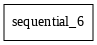

Model plot saved in file: deep_autoviml_taxi_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.3026315789473684}
    original datasize = 892, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 1000
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train 

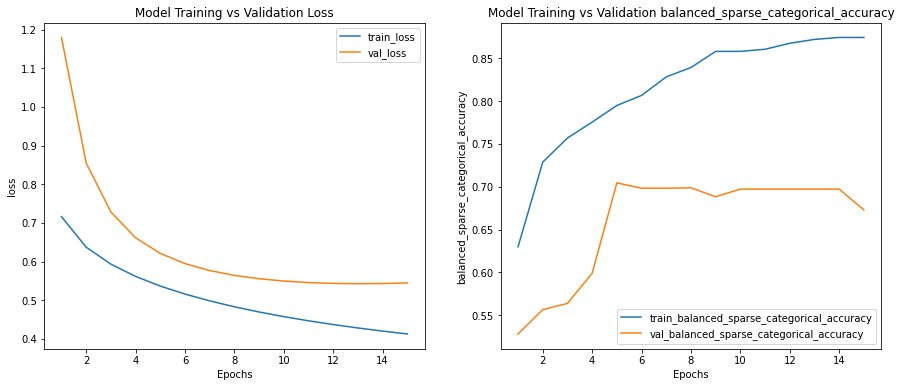

Time taken to train model (in mins) = 1
    Stopped epoch = 5
Held out data actuals shape: (96,)
    samples from label: [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

Held out predictions shape:(96,)
    Sample predictions: [0 1 1 1 0 1 1 0 1 1]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Survived
#################################################################


    Accuracy          = 68.8%
    Balanced Accuracy = 72.1%
    Precision         = 57.4%
    Average Precision = 73.0%
    Recall            = 89.7%
    F1 Score          = 70.0%
    ROC AUC           = 69.2%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.008527925
    set learning rate using best model: 0.008527925
    max epochs for training = 5

Model not being saved since save_model_flag set to False...
6274

Saving vocab dictionary using pickle in taxi/auto/model_2021_10_30-21_36_14/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in taxi/auto/model_2021_10_30-21_36_14/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in taxi/auto/model_2021_10_30-21_36_14/artifacts/var_df.pickle...will take time...
    Saved pickle file in taxi/auto/model_2021_10_30-21_36_14/artifacts/var_df.pickle

Deep_Auto_ViML completed. Total time taken = 1

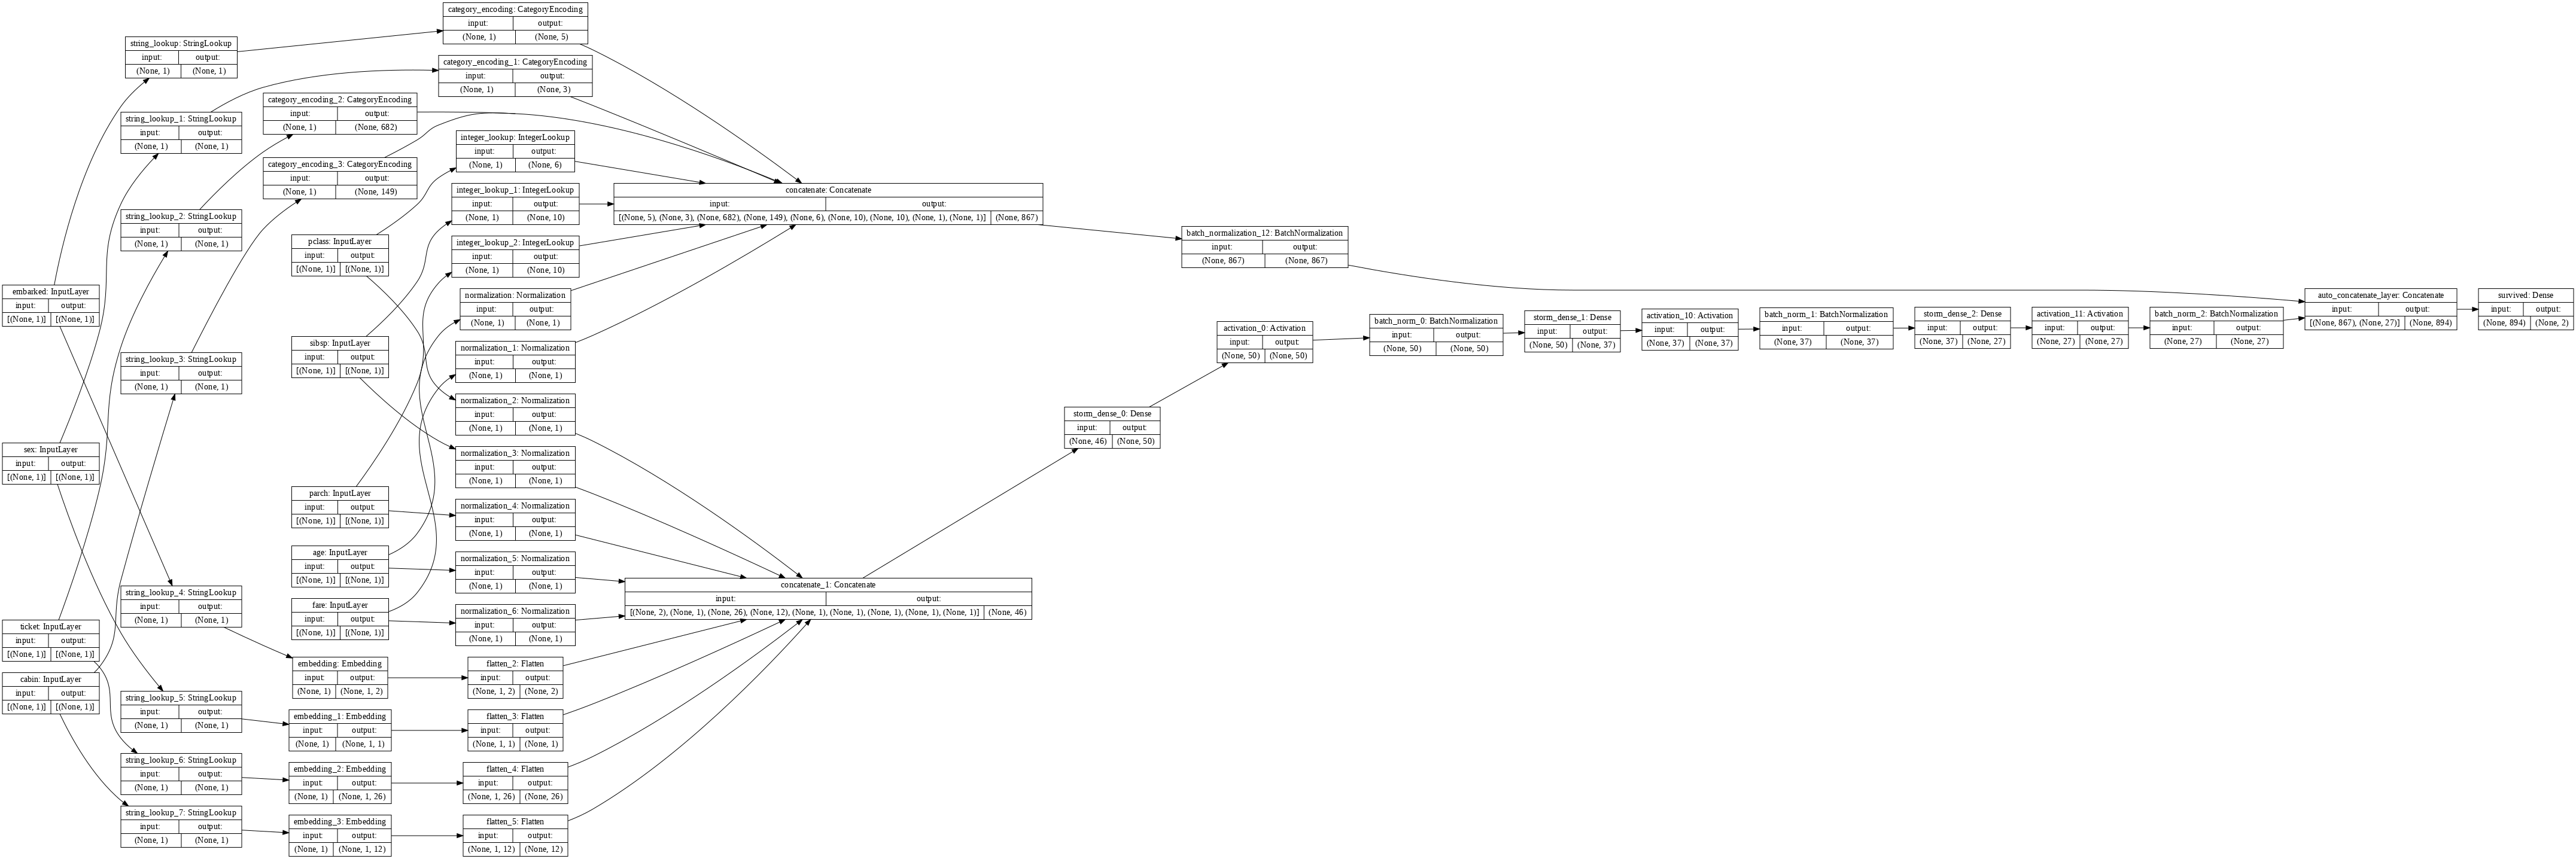

Model plot saved in file: deep_autoviml_taxi_auto_model_after.png


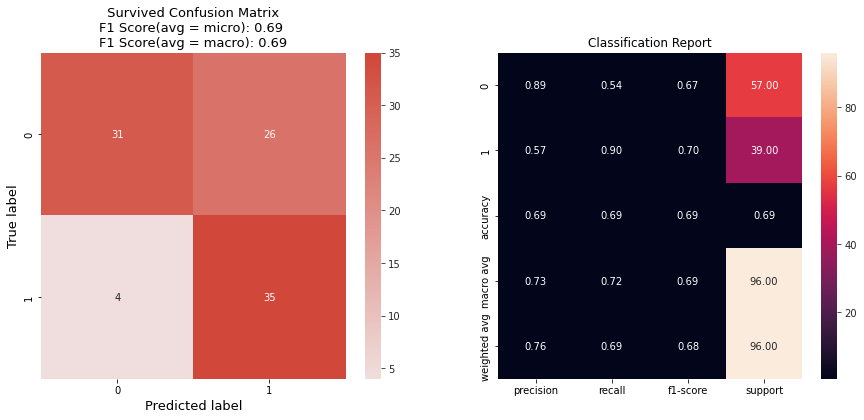

In [ ]:
model, cat_vocab_dict = deepauto.fit(train_datafile, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=1)

In [ ]:
from deep_autoviml.utilities.utilities import plot_classification_results, print_regression_model_stats
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
#from autoviml.Auto_ViML import plot_regression_scatters
predictions = deepauto.predict(model, project_name, test_dataset=test_datafile,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7f33f71d5bd0> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7f33f71d5bd0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 418
Alert! Modified column names to satisfy rules for column names in Tensorflow...
Alert! cabin has 2 mixed data types: Index([<class 'float'>, <class 'str'>], dtype='object') 
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    11 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        2 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 1, cats = 1, high cats = 1,

In [ ]:
y_preds = predictions[1]
print("Predictions for first ten rows:",y_preds[:10])

Predictions for first ten rows: [0 1 0 0 1 0 1 1 1 0]
